This assignment aims at applying descriptive statistics to find trends in IRIS data




1.Load the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris,load_digits

# Load Iris dataset
iris = load_iris()


2. Create a DataFrame from the sklearn Iris Dataset
The load_iris() function from sklearn.datasets provides the data and target (species) separately.
We'll combine them into a pandas DataFrame for easy manipulation and analysis.

In [3]:
# Create DataFrame from sklearn iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add species target as a new column
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first 5 rows of the dataset
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


3. Describe your data
We use the .describe() method to get basic statistics like mean, standard deviation, etc.
The .info() method gives details about the dataset such as number of rows, columns, and data types.

In [4]:
# Get basic descriptive statistics for numeric columns
iris_df.describe()

# Check data types and missing values
iris_df.info()

# Get the shape of the DataFrame (rows, columns)
iris_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   Species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


(150, 5)

4. Exploring the Species Column
The .unique() method allows us to see the different categories in the Species column.
We group the dataset by species to count the number of samples per species.


In [5]:
# Display the unique species in the dataset
iris_df['Species'].unique()

# Group by 'Species' and count the number of samples in each species
species_count = iris_df.groupby('Species', as_index=False).size()
species_count


<ipython-input-5-3e3e437262a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_count = iris_df.groupby('Species', as_index=False).size()


,Species,size
0,setosa,50
1,versicolor,50
2,virginica,50


5. Scatter Plot: Sepal Length vs Sepal Width
We create a scatter plot to explore the relationship between Sepal Length and Sepal Width, colored by species.

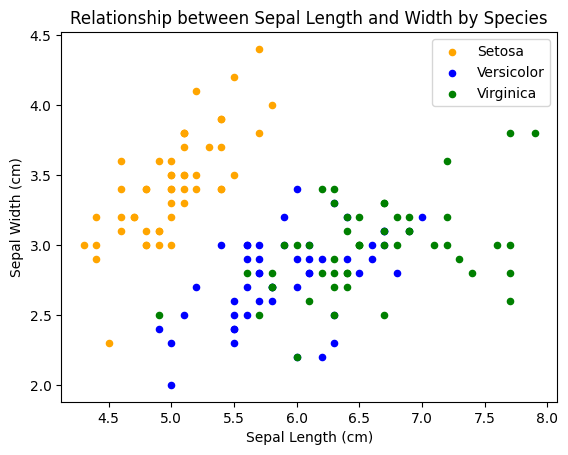

In [6]:
# Scatter plot for Sepal Length vs Sepal Width, color-coded by species
ax = iris_df[iris_df['Species'] == 'setosa'].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', color='orange', label='Setosa')
iris_df[iris_df['Species'] == 'versicolor'].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', color='blue', label='Versicolor', ax=ax)
iris_df[iris_df['Species'] == 'virginica'].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', color='green', label='Virginica', ax=ax)

# Set axis labels and title
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
ax.set_title("Relationship between Sepal Length and Width by Species")
plt.show()


6. Scatter Plot: Petal Length vs Petal Width using Seaborn's FacetGrid
We use Seaborn’s FacetGrid to create scatter plots of Petal Length vs Petal Width for each species.

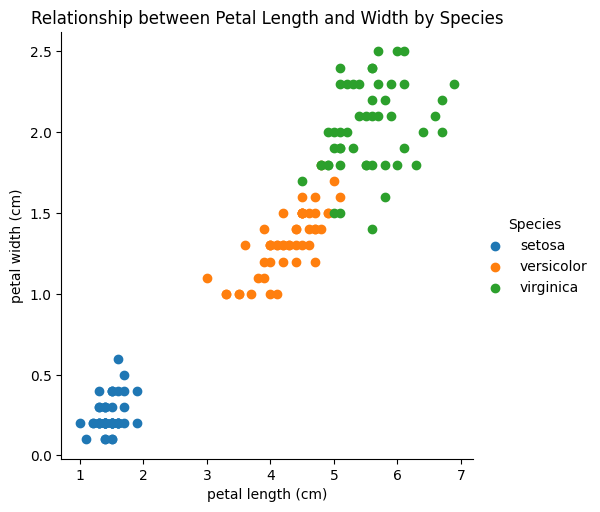

In [9]:
# Use Seaborn FacetGrid for a scatter plot of Petal Length vs Petal Width by species
import seaborn as sns
sns.FacetGrid(iris_df, hue='Species', height=5).map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend()


# Set plot title
plt.title("Relationship between Petal Length and Width by Species")
plt.show()


7. Correlation Matrix and Heatmap
We compute the correlation matrix to understand the relationships between numerical features.
A heatmap is used to visualize the correlation matrix, where the intensity of color represents the strength of the correlation.

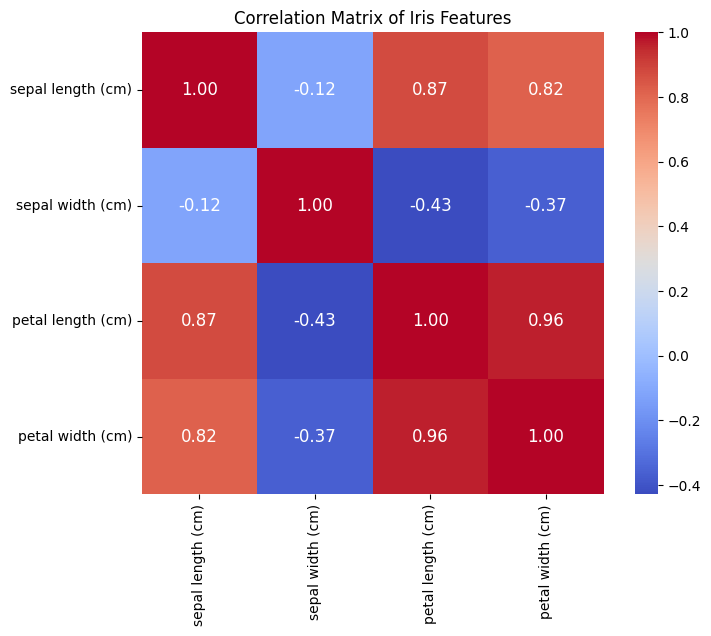

In [10]:
# Select numerical columns for correlation matrix
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Compute correlation matrix
corr_matrix = iris_df[cols].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True,
                      fmt='.2f', annot_kws={'size': 12}, yticklabels=cols, xticklabels=cols)

# Set title
plt.title("Correlation Matrix of Iris Features")
plt.show()


**Conclusion:**
The scatter plots suggest clear differences between species based on petal and
sepal dimensions.
Petal length and petal width are highly correlated, as shown in both the scatter plots and the correlation matrix.
Sepal length and width have less correlation compared to petals.